# Data Cleaning & EDA

In [1]:
import pandas as pd
import numpy as np

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [26]:
df_products = pd.read_csv('dfs_test.csv')
df_reviews = pd.read_csv('reviews_data.csv')
df_ratings = pd.read_csv('agg_rating.csv')
df_summaries = pd.read_csv('summary_data.csv')

In [30]:
df_products.drop(columns = 'Unnamed: 0', inplace = True)
df_reviews.drop(columns = 'Unnamed: 0', inplace = True)
df_ratings.drop(columns = 'Unnamed: 0', inplace = True)
df_summaries.drop(columns = 'Unnamed: 0', inplace = True)

In [6]:
df_products.head()

,brand,category,name,price,sale_price,url,product_id
0,FENTY BEAUTY by Rihanna,Foundation,Pro Filt'r Hydrating Longwear Foundation,35.0,NaN,https://www.sephora.com/product/pro-filt-r-hyd...,2268274
1,PAT McGRATH LABS,Foundation,Skin Fetish: Sublime Perfection Foundation,68.0,NaN,https://www.sephora.com/product/skin-fetish-su...,2257111
2,FENTY BEAUTY by Rihanna,Foundation,Pro Filt'r Soft Matte Longwear Foundation,35.0,NaN,https://www.sephora.com/product/pro-filtr-soft...,2164671
3,MILK MAKEUP,Foundation,Flex Foundation Stick,36.0,NaN,https://www.sephora.com/product/flex-foundatio...,2242105
4,Estée Lauder,Foundation,Double Wear Stay-in-Place Foundation,43.0,NaN,https://www.sephora.com/product/double-wear-st...,2112167


In [7]:
df_reviews.head()

,age_range,eye_color,product_id,rating,review,skin_tone,skin_type,title,user
0,NaN,Brown,2268274,5,"WOW! I love this foundation, and the packaging...",Olive,Combination,Love this foundation in addition to the soft m...,TyraFox
1,NaN,Brown,2268274,5,A natural finish and at the same time gives co...,NaN,Oily,Feels airy and fresh with natural coverage,veens
2,18-24,Brown,2268274,4,"Uh, at first I wanted to rate this a tad bit l...",Dark,Combination,Oh man...,KhrisGal
3,NaN,Brown,2268274,4,I wear 290 in the Soft Matte Longwear Foundati...,Olive,Combination,NaN,nichemarkit
4,35-44,Brown,2268274,5,Wow. This foundation is a drink of water that ...,Medium,Combination,Wow. A drink of water foundation.,northernrokz


In [8]:
df_ratings.head()

,1 star,2 stars,3 stars,4 stars,5 stars,avg_rating,product_id,review_count
0,0,0,0,5,10,4.7,2268274,15 reviews
1,28,34,53,210,535,4.4,2257111,860 reviews
2,"1,139","1,279","1,324","2,145","8,373",4.1,2164671,"14,260 reviews"
3,0,9,21,106,207,4.5,2242105,343 reviews
4,213,257,299,836,"3,758",4.4,2112167,"5,363 reviews"


In [9]:
df_summaries.head()

,key_word,key_word_count,product_id
0,long wearing,"(1,165)",2112167
1,buildable coverage,(905),2112167
2,oil-free,(608),2112167
3,full coverage,(77),2112167
4,cakey,(26),2112167


In [17]:
df_products['target'] = df_products['sale_price'].map(lambda x: 1 if x > 0 else 0)

In [23]:
df_ratings['review_count'] = df_ratings['review_count'].map(lambda x: int(x.split()[0].strip().replace(',', '')))

In [28]:
df_summaries['key_word_count'] = df_summaries['key_word_count'].map(lambda x: int(x[1:-1].replace(',', '')))

In [35]:
# transposing rows to columns to have key words as features
df_sum_pivot = df_summaries.pivot_table(index = 'product_id', columns = 'key_word', values = 'key_word_count')

In [50]:
df_sum_pivot.fillna(0, inplace = True)

In [37]:
df_ratings.shape

(965, 8)

In [38]:
df_products.shape

(1387, 8)

In [39]:
df_products['target'].value_counts()

0    1209
1     178
Name: target, dtype: int64

In [40]:
# Percent of sale items in data set
df_products['target'].mean()

0.12833453496755587

In [43]:
sale_only = df_products[df_products['target'] == 1]

In [48]:
# Top 5 product categories that go on sale
sale_only['category'].value_counts()[:5]

Face Primer               31
Mascara                   21
Setting Spray & Powder    21
Highlighter               12
Lipstick                  11
Name: category, dtype: int64

In [52]:
len(set(df_reviews['product_id']))

754

In [55]:
df_products[df_products['target'] == 0].describe()

,price,sale_price,product_id,target
count,1209.000000,0.0,1.209000e+03,1209.0
mean,32.842349,NaN,1.899937e+06,0.0
std,21.215426,NaN,3.754432e+05,0.0
min,3.000000,NaN,5.153200e+04,0.0
25%,22.000000,NaN,1.766542e+06,0.0
50%,29.000000,NaN,2.029353e+06,0.0
75%,39.000000,NaN,2.171742e+06,0.0
max,270.000000,NaN,2.282028e+06,0.0


In [56]:
sale_only.describe()

,price,sale_price,product_id,target
count,178.000000,178.000000,1.780000e+02,178.0
mean,32.691011,16.915730,1.829448e+06,1.0
std,16.560027,9.761632,3.457461e+05,0.0
min,6.000000,3.000000,1.374710e+05,1.0
25%,24.000000,12.250000,1.666068e+06,1.0
50%,29.000000,15.000000,1.899968e+06,1.0
75%,39.000000,20.000000,2.084989e+06,1.0
max,112.000000,75.000000,2.254597e+06,1.0


In [58]:
df_products.head()

,brand,category,name,price,sale_price,url,product_id,target
0,FENTY BEAUTY by Rihanna,Foundation,Pro Filt'r Hydrating Longwear Foundation,35.0,NaN,https://www.sephora.com/product/pro-filt-r-hyd...,2268274,0
1,PAT McGRATH LABS,Foundation,Skin Fetish: Sublime Perfection Foundation,68.0,NaN,https://www.sephora.com/product/skin-fetish-su...,2257111,0
2,FENTY BEAUTY by Rihanna,Foundation,Pro Filt'r Soft Matte Longwear Foundation,35.0,NaN,https://www.sephora.com/product/pro-filtr-soft...,2164671,0
3,MILK MAKEUP,Foundation,Flex Foundation Stick,36.0,NaN,https://www.sephora.com/product/flex-foundatio...,2242105,0
4,Estée Lauder,Foundation,Double Wear Stay-in-Place Foundation,43.0,NaN,https://www.sephora.com/product/double-wear-st...,2112167,0


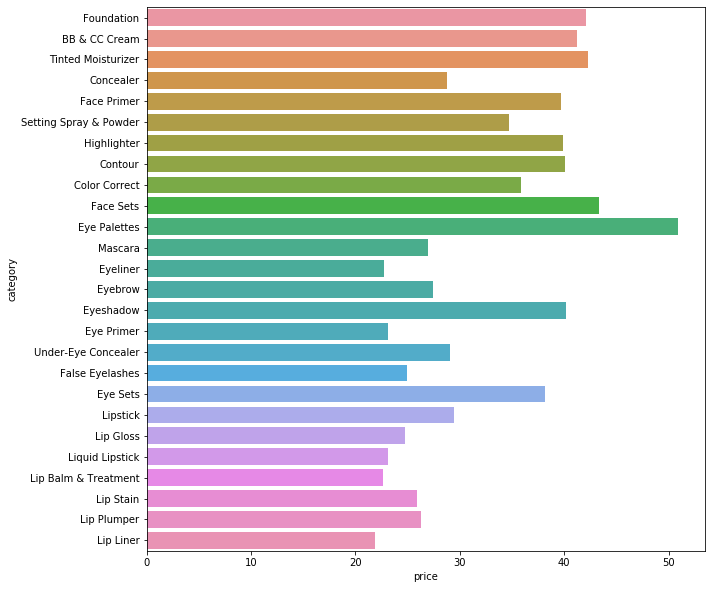

In [71]:
plt.figure(figsize = (10,10))
sns.barplot(data = df_products, x = 'price', y = 'category', ci = None)

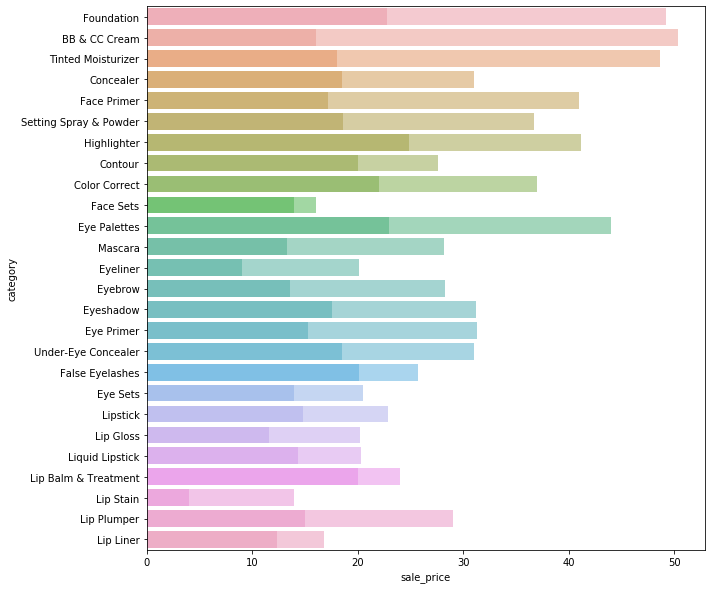

In [73]:
plt.figure(figsize = (10,10))
sns.barplot(data = sale_only, x = 'price', y = 'category', alpha = .5, ci = None)
sns.barplot(data = sale_only, x = 'sale_price', y = 'category', alpha = .5, ci = None)

In [75]:
sale_only['sale_pct'] = (sale_only['price'] - sale_only['sale_price'])/sale_only['price']

/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [79]:
sale_only['sale_pct'] = sale_only['sale_pct'].map(lambda x: np.round((x * 100), 2))

/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [80]:
sale_only

,brand,category,name,price,sale_price,url,product_id,target,sale_pct
5,Giorgio Armani Beauty,Foundation,Luminous Silk Foundation,64.0,42.0,https://www.sephora.com/product/luminous-silk-...,2079168,1,34.38
6,Laura Mercier,Foundation,Tinted Moisturizer Natural Skin Perfector Broa...,47.0,24.0,https://www.sephora.com/product/tinted-moistur...,2250603,1,48.94
9,IT Cosmetics,Foundation,CC+ Cream with SPF 50+,39.0,15.0,https://www.sephora.com/product/your-skin-but-...,1868165,1,61.54
23,Kat Von D,Foundation,Lock-It Foundation,36.0,18.0,https://www.sephora.com/product/lock-it-tattoo...,2180578,1,50.00
55,AMOREPACIFIC,Foundation,Color Control Cushion Compact Broad Spectrum S...,60.0,15.0,https://www.sephora.com/product/color-control-...,1496488,1,75.00
60,IT Cosmetics,BB & CC Cream,CC+ Cream with SPF 50+,39.0,15.0,https://www.sephora.com/product/your-skin-but-...,1868165,1,61.54
64,Dr. Jart+,BB & CC Cream,Cicapair ™ Tiger Grass Color Correcting Treatm...,52.0,18.0,https://www.sephora.com/product/cicapair-tiger...,1855709,1,65.38
68,AMOREPACIFIC,BB & CC Cream,Color Control Cushion Compact Broad Spectrum S...,60.0,15.0,https://www.sephora.com/product/color-control-...,1496488,1,75.00
97,Laura Mercier,Tinted Moisturizer,Tinted Moisturizer Natural Skin Perfector Broa...,47.0,24.0,https://www.sephora.com/product/tinted-moistur...,2250603,1,48.94
98,IT Cosmetics,Tinted Moisturizer,CC+ Cream with SPF 50+,39.0,15.0,https://www.sephora.com/product/your-skin-but-...,1868165,1,61.54


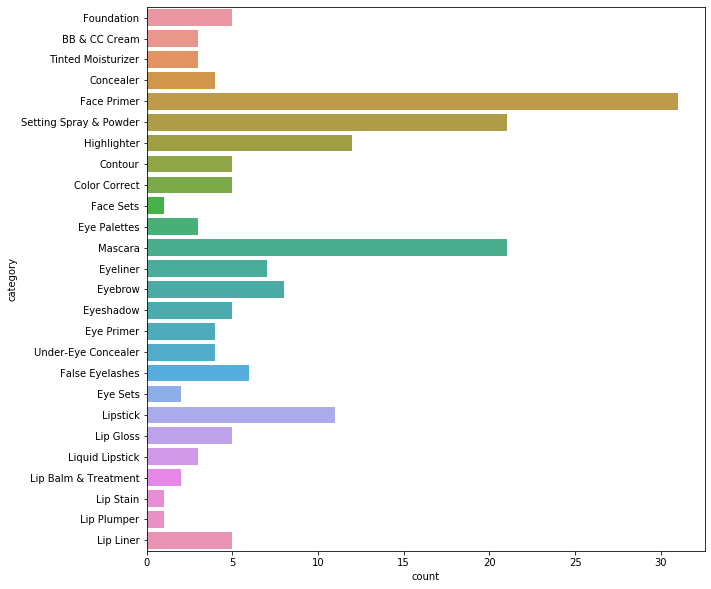

In [83]:
plt.figure(figsize = (10,10))
sns.countplot(data = sale_only, y = 'category')

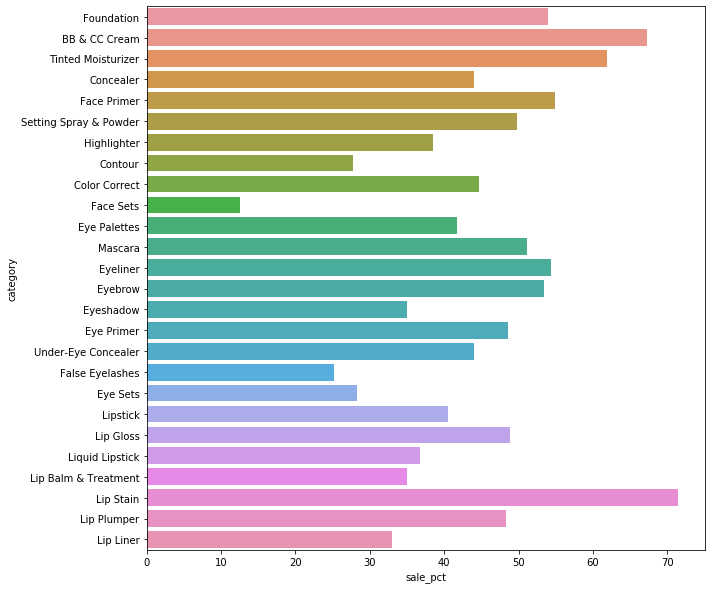

In [86]:
plt.figure(figsize = (10, 10))
sns.barplot(data = sale_only, y = 'category', x = 'sale_pct', ci = None)